In [7]:
!pip install sentence-transformers



[notice] A new release of pip is available: 23.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
!pip install transformers datasets torch



[notice] A new release of pip is available: 23.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install faiss-cpu

   ---------------------------------------- 0.0/15.0 MB ? eta -:--:--
   ---------------- ----------------------- 6.3/15.0 MB 32.1 MB/s eta 0:00:01
   --------------------------------- ------ 12.6/15.0 MB 31.5 MB/s eta 0:00:01
   ---------------------------------------- 15.0/15.0 MB 27.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install sacremoses


[notice] A new release of pip is available: 23.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
from transformers import AutoTokenizer, BioGptForCausalLM


model = "microsoft/biogpt-large"
tokenizer = AutoTokenizer.from_pretrained(model)
biogpt = BioGptForCausalLM.from_pretrained(model)

def ask_biogpt(question):
    responses= []
    for question in questions:
        prompt = f"Question: {question}\nAnswer: "  # On structure l’entrée
        inputs = tokenizer(prompt, return_tensors="pt")
        output = biogpt.generate(**inputs, max_length=200)
        response = tokenizer.decode(output[0], skip_special_tokens=True)
        responses.append(response)
    return responses

# Exemple de question
questions= [
    "What are the symptoms of  breast cancer ?",
    "What should I do when I have a headache ?",
     "How does hypertension affect the heart?",
    "How can I see that I have skin cancer ?",
    "Is it safe to take paracetamol and ibuprofen together?",
    "What should I do if I experience chest pain ?",
    "What are the common symptoms of endometriosis?",
    "What are the signs of a seizure ?",
    "What are the best ways to manage chronic pain?",
    " I have a lump in my leg, What should I do?",
    "How to I know if I have food allergy?",
    "How long does it take to recover from a fractured tibia?",
    "What are the signs of a stroke?",
    "What are the early signs of pregnancy?",
    " Is an acute headache a symptom of brain cancer?",

    "Is ice effective for a sprained ankle ?",
    "How can I ease my period pain ?",
    "There is a black dot in my vision. Do I have eye cancer ?",
    " There is a yellow dot in my left eye. What it is ?",
    "I have a lump in my neck, should I be worried?",
    "At what age should a baby drink water?",
    "Why my heart and my left arm hurts ?",
    "Why does hurt when I pee?",
    "What causes intermittent headaches?",

    

    "What are the recommended guidelines for gestational diabetes screening and management?", #OK
    "How does hypertension contribute to the development of atrial fibrillation?",
    "How can we differentiate between essential tremor and Parkinson’s disease?",#OK
    "What are the indications for emergency C-section in labor?",#OK
    "How can we differentiate between bacterial and viral meningitis based on clinical and laboratory findings?",
    "How can we differentiate between an ischemic and a hemorrhagic stroke based on clinical presentation?",
    "What are the hemodynamic effects of propofol versus etomidate in induction of anesthesia?",
]

reponses= ask_biogpt(questions)

for q,r in zip(questions,reponses):
    print(f"question:{q} \n answer:{r} \n")


question:What are the symptoms of  breast cancer ? 
 answer:Question: What are the symptoms of breast cancer? Answer: The symptoms of breast cancer are pain, swelling, redness, and a lump. < / FREETEXT > < / ABSTRACT > ▃ 

question:What should I do when I have a headache ? 
 answer:Question: What should I do when I have a headache? Answer: I'm taking a beta blocker. < / FREETEXT > < / TITLE > ▃ 

question:How does hypertension affect the heart? 
 answer:Question: How does hypertension affect the heart? Answer: Hypertension causes cardiac hypertrophy and fibrosis. < / FREETEXT > < / TITLE > ▃ 

question:How can I see that I have skin cancer ? 
 answer:Question: How can I see that I have skin cancer? Answer: The lesion is a basal cell carcinoma. < / FREETEXT > < / ABSTRACT > ▃ 

question:Is it safe to take paracetamol and ibuprofen together? 
 answer:Question: Is it safe to take paracetamol and ibuprofen together? Answer: Yes. < / FREETEXT > < / TITLE > ▃ 

question:What should I do if I

In [15]:
import json

#keeping all the answers and questions in a json file
tout=[]
for q,r in zip(questions,reponses):
    data_json_biogpt = {"question": q, "answer": r}
    tout.append(data_json_biogpt)
with open("json_biogpt.json", "w", encoding="utf-8") as f:
           json.dump(tout, f, ensure_ascii=False, indent=4) 



[{'question': 'What are the symptoms of  breast cancer ?', 'answer': 'Question: What are the symptoms of breast cancer? Answer: The symptoms of breast cancer are pain, swelling, redness, and a lump. < / FREETEXT > < / ABSTRACT > ▃'}, {'question': 'What should I do when I have a headache ?', 'answer': "Question: What should I do when I have a headache? Answer: I'm taking a beta blocker. < / FREETEXT > < / TITLE > ▃"}, {'question': 'How does hypertension affect the heart?', 'answer': 'Question: How does hypertension affect the heart? Answer: Hypertension causes cardiac hypertrophy and fibrosis. < / FREETEXT > < / TITLE > ▃'}, {'question': 'How can I see that I have skin cancer ?', 'answer': 'Question: How can I see that I have skin cancer? Answer: The lesion is a basal cell carcinoma. < / FREETEXT > < / ABSTRACT > ▃'}, {'question': 'Is it safe to take paracetamol and ibuprofen together?', 'answer': 'Question: Is it safe to take paracetamol and ibuprofen together? Answer: Yes. < / FREETEX

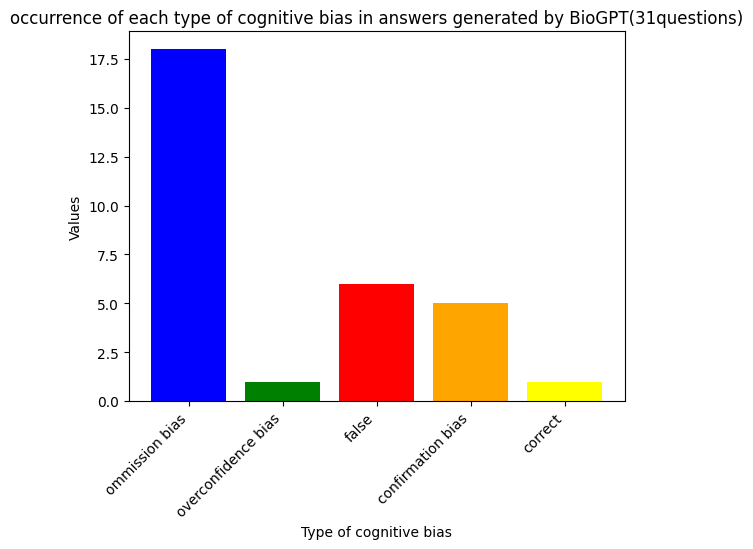

In [1]:
#analyzing the proportion of cognitive bias 

import json
from collections import Counter
import matplotlib.pyplot as plt

bias=[]
with open("json_biogpt.json", "r", encoding="utf-8") as f:
    file_j= json.load(f)
    
for dico in file_j:
    bias.append(dico["cognitive bias"])
    
freq = Counter()
freq.update(bias)
val= freq.values()

labels = ["ommission bias", 'overconfidence bias','false','confirmation bias','correct'] 

plt.bar(labels, val, color=['blue', 'green', 'red','orange','yellow'])


plt.xlabel("Type of cognitive bias")
plt.ylabel("Values")
plt.title("occurrence of each type of cognitive bias in answers generated by BioGPT(31questions)")
plt.xticks(rotation=45, ha='right')
plt.savefig("proportion_of_cognitive_bias_for_BioGPT_(31_questions).jpg")
plt.show()


In [1]:
#Fine tuning with medquad
import pandas as pd
from datasets import Dataset,DatasetDict
from sklearn.model_selection import train_test_split

df = pd.read_csv("medquad/medquad.csv")# taille totale 16412
df = df[["question", "answer","source"]]
train,test= train_test_split(df, test_size= 0.2, random_state=42)


# Convertir en dataset Hugging Face
dataset_medquad = DatasetDict({
    "train": Dataset.from_pandas(train.reset_index(drop=True)),
    "test": Dataset.from_pandas(test.reset_index(drop=True))
})
# dataset_medquad_train = Dataset.from_pandas(train)

# dataset_medquad_test= Dataset.from_pandas(test)




In [4]:
from transformers import AutoTokenizer, BioGptForCausalLM
import torch

model = "microsoft/biogpt-large"
tokenizer = AutoTokenizer.from_pretrained(model)
biogpt= BioGptForCausalLM.from_pretrained(model)

# Freeze all parameters except (final layer)
for name, param in biogpt.named_parameters():
    if "layers.47" in name:
        param.requires_grad = True
    else:
        param.requires_grad = False


        
#preprocess function        
def preprocess(example):
    input_text = f"Question: {example['question']}\nAnswer:"
    target_text = f" {example['answer']}"  # prepend space for natural start
    
    inputs = tokenizer(
        input_text,
        max_length=512,
        truncation=True,
        padding="max_length",  # Ensure padding to max length
        return_tensors="pt"
    )

    targets = tokenizer(
        target_text,
        max_length=512,
        truncation=True,
        padding="max_length",  # Ensure padding to max length
        return_tensors="pt"
    )

    # Squeeze to remove extra dimensions added by return_tensors="pt"
    input_ids = inputs["input_ids"].squeeze()
    attention_mask = inputs["attention_mask"].squeeze()
    labels = targets["input_ids"].squeeze()

    # Ensure padding tokens in labels are ignored during loss calculation
    labels[labels == tokenizer.pad_token_id] = -100

    return {
        "input_ids": input_ids,
        "attention_mask": attention_mask,
        "labels": labels
    }
   

# apply tokenizer
tokenized_dataset = dataset_medquad.map(preprocess, remove_columns=["question", "answer"])

    
# def tokenize_function(example):
#     return tokenizer(
#         example["question"], 
#         example["answer"], 
#         truncation="only_second",  # Coupe uniquement la réponse si trop longue
#         max_length=1024,
#         padding="max_length",
#         stride=128
#     )

# # Appliquer la tokenization sur tout le dataset
# tokenized_dataset_train = dataset_medquad_train.map(tokenize_function, batched=True)
# tokenized_dataset_train = tokenized_dataset_train.map(lambda x: {"labels": x["input_ids"]})

# tokenized_dataset_test = dataset_medquad_test.map(tokenize_function, batched=True)
# tokenized_dataset_test = tokenized_dataset_test.map(lambda x: {"labels": x["input_ids"]})



tokenizer_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.24M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/566k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/658 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/6.29G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

Map:   0%|          | 0/13129 [00:00<?, ? examples/s]

Map:   0%|          | 0/3283 [00:00<?, ? examples/s]

In [6]:
#This cell is to check the statue of each parameters
#if they are correctly frozen or no 

# Print parameters with requires_grad=True, the layers 
trainable_params = [p for p in biogpt.parameters() if p.requires_grad]
print(f"Number of trainable parameters: {len(trainable_params)}")

# Now create the optimizer with trainable parameters only
#optimizer = AdamW(trainable_params, lr=5e-5)

# Print all model parameters with requires_grad=True
for name, param in biogpt.named_parameters():
    if param.requires_grad:
        print("trainable layers",name)
        
for name, param in biogpt.named_parameters():
    print(f"{name}: requires_grad = {param.requires_grad}")

#print the name of each layer in the hope of finding the last layer to train
for name, param in biogpt.named_parameters():
    print("HEEEEEEEEEERE",name)


Number of trainable parameters: 16
trainable layers biogpt.layers.47.self_attn.k_proj.weight
trainable layers biogpt.layers.47.self_attn.k_proj.bias
trainable layers biogpt.layers.47.self_attn.v_proj.weight
trainable layers biogpt.layers.47.self_attn.v_proj.bias
trainable layers biogpt.layers.47.self_attn.q_proj.weight
trainable layers biogpt.layers.47.self_attn.q_proj.bias
trainable layers biogpt.layers.47.self_attn.out_proj.weight
trainable layers biogpt.layers.47.self_attn.out_proj.bias
trainable layers biogpt.layers.47.self_attn_layer_norm.weight
trainable layers biogpt.layers.47.self_attn_layer_norm.bias
trainable layers biogpt.layers.47.fc1.weight
trainable layers biogpt.layers.47.fc1.bias
trainable layers biogpt.layers.47.fc2.weight
trainable layers biogpt.layers.47.fc2.bias
trainable layers biogpt.layers.47.final_layer_norm.weight
trainable layers biogpt.layers.47.final_layer_norm.bias
biogpt.embed_tokens.weight: requires_grad = False
biogpt.embed_positions.weight: requires_gra

In [12]:

# tokenized_dataset_train = tokenized_dataset_train.remove_columns(["__index_level_0__"])

# tokenized_dataset_test = tokenized_dataset_test.remove_columns(["__index_level_0__"])


In [5]:
import torch
torch.cuda.empty_cache()

In [6]:
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'max_split_size_mb:128'


torch.cuda.set_per_process_memory_fraction(0.8, device=0)  # Use 80% of GPU memory
torch.backends.cudnn.benchmark = True  #D


In [7]:
from transformers import TrainingArguments, Trainer
from sklearn.metrics import accuracy_score
from transformers import AdamW


biogpt.train()
optimizer = AdamW(filter(lambda p: p.requires_grad, biogpt.parameters()), lr=5e-5)



# Configurer l'entraînement
training_args = TrainingArguments(
    output_dir="./biogpt_medquad",
    logging_dir="./logs",
    remove_unused_columns=False,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch", 
    fp16=True,
    report_to="none",
    per_device_train_batch_size=4,
    num_train_epochs=4,
    weight_decay=0.01,
)



# Créer le trainer
trainer = Trainer(
    model=biogpt,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"], 
    #compute_metrics=compute_metrics,
    tokenizer=tokenizer,
)

# torch.cuda.empty_cache()

# Lancer l'entraînement
trainer.train()

trainer.save_model("./biogpt-finetuned-medquad")


2025-04-22 12:32:24.336368: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-22 12:32:24.336473: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-22 12:32:24.414159: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-22 12:32:24.559973: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-22 12:32:25.894725: W tensorflow/compiler/tf2

Epoch,Training Loss,Validation Loss
1,6.788100,6.435655
2,6.490100,6.342552
3,6.425300,6.305103
4,6.396400,6.293557


IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [8]:
#TESTING THE MODEL AFTER FINE-TUNING

tokenizer2= AutoTokenizer.from_pretrained("./biogpt-finetuned-medquad")
biogpt_medquad= BioGptForCausalLM.from_pretrained("./biogpt-finetuned-medquad")

def ask_biogpt_medquad(question):
    responses= []
    for question in questions:
        prompt = f"Question: {question}\nAnswer: "  # On structure l’entrée
        inputs = tokenizer2(prompt, return_tensors="pt")
        output = biogpt_medquad.generate(**inputs, max_length=200,do_sample=False,num_beams=1)
        response = tokenizer2.decode(output[0], skip_special_tokens=True)
        responses.append(response)
    return responses

# Exemple de question
questions= [
    "What are the symptoms of  breast cancer ?",
    "What should I do when I have a headache ?",
     "How does hypertension affect the heart?",
    "How can I see that I have skin cancer ?",
    "Is it safe to take paracetamol and ibuprofen together?",
    "What should I do if I experience chest pain ?",
    "What are the common symptoms of endometriosis?",
    "What are the signs of a seizure ?",
    "What are the best ways to manage chronic pain?",
    " I have a lump in my leg, What should I do?",
    "How to I know if I have food allergy?",
    "How long does it take to recover from a fractured tibia?",
    "What are the signs of a stroke?",
    "What are the early signs of pregnancy?",
    " Is an acute headache a symptom of brain cancer?",

    "Is ice effective for a sprained ankle ?",
    "How can I ease my period pain ?",
    "There is a black dot in my vision. Do I have eye cancer ?",
    " There is a yellow dot in my left eye. What it is ?",
    "I have a lump in my neck, should I be worried?",
    "At what age should a baby drink water?",
    "Why my heart and my left arm hurts ?",
    "Why does hurt when I pee?",
    "What causes intermittent headaches?",

    

    "What are the recommended guidelines for gestational diabetes screening and management?", #OK
    "How does hypertension contribute to the development of atrial fibrillation?",
    "How can we differentiate between essential tremor and Parkinson’s disease?",#OK
    "What are the indications for emergency C-section in labor?",#OK
    "How can we differentiate between bacterial and viral meningitis based on clinical and laboratory findings?",
    "How can we differentiate between an ischemic and a hemorrhagic stroke based on clinical presentation?",
    "What are the hemodynamic effects of propofol versus etomidate in induction of anesthesia?",
]

reponses= ask_biogpt_medquad(questions)

for q,r in zip(questions,reponses):
    print(f"question:{q} \n answer:{r} \n")

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

question:What are the symptoms of  breast cancer ? 
 answer:Question: What are the symptoms of breast cancer? Answer: the symptoms of breast cancer are the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the 

question:What should I do when I have a headache ? 
 answer:Question: What should I do when I have a headache? Answer:,.,.............

The  asnwers are terrible it seems that the model has forgotten its previous knowlegdge, I will now try the RAG method

In [2]:



#formatter le dataset en str pr faciliter embedding
docs = [
    f"Q: {row['question']}\nA: {row['answer']}\nSource:{row['source']}"
    for _, row in df.iterrows() ]



In [ ]:
from sentence_transformers import SentenceTransformer
import faiss #facebook AI similarity Search, search engine for vector similarity

embedding_model = SentenceTransformer("pritamdeka/BioBERT-mnli-snli-scinli-scitail-mednli-stsb")  # Biomedical embeddings ref ds favoris
# a specific embedding model trained on biomedical dataset

# Convert docs to vectors
embeddings = embedding_model.encode(docs, show_progress_bar=True)

# Create FAISS index
index = faiss.IndexFlatL2(embeddings.shape[1]) #calcul similarité avec la distance euclidienne
index.add(embeddings) 

Batches:   0%|          | 0/513 [00:00<?, ?it/s]

In [5]:
query = [
    "What are the symptoms of  breast cancer ?",
    "What should I do when I have a headache ?",
     "How does hypertension affect the heart?",
    "How can I see that I have skin cancer ?",
    "Is it safe to take paracetamol and ibuprofen together?",
    "What should I do if I experience chest pain ?",
    "What are the common symptoms of endometriosis?",
    "What are the signs of a seizure ?",
    "What are the best ways to manage chronic pain?",
    " I have a lump in my leg, What should I do?",
    "How to I know if I have food allergy?",
    "How long does it take to recover from a fractured tibia?",
    "What are the signs of a stroke?",
    "What are the early signs of pregnancy?",
    " Is an acute headache a symptom of brain cancer?",

    "Is ice effective for a sprained ankle ?",
    "How can I ease my period pain ?",
    "There is a black dot in my vision. Do I have eye cancer ?",
    " There is a yellow dot in my left eye. What it is ?",
    "I have a lump in my neck, should I be worried?",
    "At what age should a baby drink water?",
    "Why my heart and my left arm hurts ?",
    "Why does hurt when I pee?",
    "What causes intermittent headaches?",

    

    "What are the recommended guidelines for gestational diabetes screening and management?", #OK
    "How does hypertension contribute to the development of atrial fibrillation?",
    "How can we differentiate between essential tremor and Parkinson’s disease?",#OK
    "What are the indications for emergency C-section in labor?",#OK
    "How can we differentiate between bacterial and viral meningitis based on clinical and laboratory findings?",
    "How can we differentiate between an ischemic and a hemorrhagic stroke based on clinical presentation?",
    "What are the hemodynamic effects of propofol versus etomidate in induction of anesthesia?",
]
query_embedding = embedding_model.encode(query,show_progress_bar=True) #applique embedding sur les questions

# Search top 3 similar docs
_, indices = index.search(query_embedding, k=3)

# Retrieve top docs
retrieved_docs = []
retrieved_sources=[]

for i, ind_list in enumerate(indices): #parcour les vectors similaire au query
    context = "\n".join(([f"Q: {df.iloc[j]['question']}\nA: {df.iloc[j]['answer']}" for j in ind_list])) #
    sources= list(set([df.iloc[j]['source'] for j in ind_list])) 
    retrieved_docs.append(context) #ajout les infos pertinentes dans une liste
    retrieved_sources.append(sources)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import torch
from transformers import AutoTokenizer, BioGptForCausalLM
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

prompts = [f"{retrieved_docs[i]}\n\nQuestion:{query[i]}\n\nAnswer:"
for i in range(len(query))] 
#prompt pr chaque query contenant 
#1. l'info pertinente (question et réponse ds le dataset medquad)
#2. la question posé
#Answer: (vide)


tokenizer = AutoTokenizer.from_pretrained("microsoft/biogpt-large")
biogpt = BioGptForCausalLM.from_pretrained("microsoft/biogpt-large").to(device)

answers=[]
for prompt in prompts:
    inputs = tokenizer(prompt, return_tensors="pt", max_length=1024, truncation=True).to(device)
    outputs = biogpt.generate(**inputs, max_new_tokens=128)
    answer= tokenizer.decode(outputs[0], skip_special_tokens=True)#retour en format str
    answers.append(answer)
    
for i,(q,a) in enumerate(zip(query, answers)):
    sources=",".join(retrieved_sources[i])
    print(f"\n question: {q}\n Answer: {a}\n Reference:{sources}\n{'='*50}")

Some answers are out of topic but overall the answers are better than the last two times, it would be better that the model answers "I don't know the response" rather than giving a response out of topic.

In [ ]:
#EVALUER
from transformers import AutoTokenizer, AutoModelForSequenceClassification


# Charger FactCC
factcc_tokenizer = AutoTokenizer.from_pretrained("manueldeprada/FactCC")
factcc_model = AutoModelForSequenceClassification.from_pretrained("manueldeprada/FactCC").to(device)

def check_fact(context, answer):
    inputs = factcc_tokenizer.encode_plus(answer, context, return_tensors="pt", truncation=True).to(device)
    with torch.no_grad():
        logits = factcc_model(**inputs).logits
    prediction = torch.argmax(logits, dim=1).item()
    return ["SUPPORTED", "REFUTED", "NEUTRAL"][prediction]

# Vérification factuelle des réponses
fact_checks = []
for i in range(len(answers)):
    verdict = check_fact(retrieved_docs[i], answers[i])
    fact_checks.append(verdict)
for i, (q, a, verdict) in enumerate(zip(query, answers, fact_checks)):
    sources = ",".join(retrieved_sources[i])
    print(f"\nQuestion: {q}\nAnswer: {a}\nFact-check: {verdict}\nReference: {sources}\n{'='*50}")


In [7]:
import json

#keeping all the answers and questions in a json file
tout2=[]
for q,r in zip(query,answers):
    data_json_biogpt_RAG = {"question": q, "answer": r}
    tout2.append(data_json_biogpt_RAG)
with open("biogpt_RAG_resultat2.json", "w", encoding="utf-8") as f:
           json.dump(tout2, f, ensure_ascii=False, indent=4) 

In [1]:
import json

# Charger l'ancien fichier JSON
with open("biogpt_RAG_resultat2.json", "r", encoding="utf-8") as f:
    old_data = json.load(f)

# Assurer que les longueurs correspondent
#assert len(old_data) == len(query) == len(answers), "Les longueurs ne correspondent pas."

# Mise à jour des champs
for i, (q, a) in enumerate(zip(query, answers)):
    old_data[i]["question"] = q
    old_data[i]["answer"] = a

# Sauvegarde du fichier mis à jour
with open("biogpt_RAG_resultat2.json", "w", encoding="utf-8") as f:
    json.dump(old_data, f, ensure_ascii=False, indent=4)


NameError: name 'query' is not defined